In [1]:
require(clusterProfiler)
require(ggplot2)
require(org.Hs.eg.db)

Loading required package: clusterProfiler



clusterProfiler v4.2.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: ggplot2

Loading required package: org.Hs.eg.db

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, ev

In [2]:
packageVersion("clusterProfiler")

[1] ‘4.2.2’

In [3]:
figdir = "figures"

# high

In [4]:
genelist <- read.csv("high_promoters_allCpGs.csv")[,"Promoter"]

In [5]:
length(genelist)

[1] 70

In [6]:
length(unique(genelist))

[1] 49

In [7]:
gene.df <- bitr(genelist, fromType = "SYMBOL",
            toType = c("ENTREZID","ENSEMBL", "SYMBOL"),
            OrgDb = org.Hs.eg.db)
genelist <- gene.df$ENTREZID
ego <- enrichGO(gene          = genelist,
                OrgDb         = org.Hs.eg.db,
                ont           = "ALL",
                pAdjustMethod = "BH",
                pvalueCutoff  = 1,
                qvalueCutoff  = 1,
                readable      = TRUE)    

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(genelist, fromType = "SYMBOL", toType = c("ENTREZID", "ENSEMBL", :
“10.2% of input gene IDs are fail to map...”


In [8]:
write.csv(as.data.frame(ego), "GOBP_high_promoters.csv")

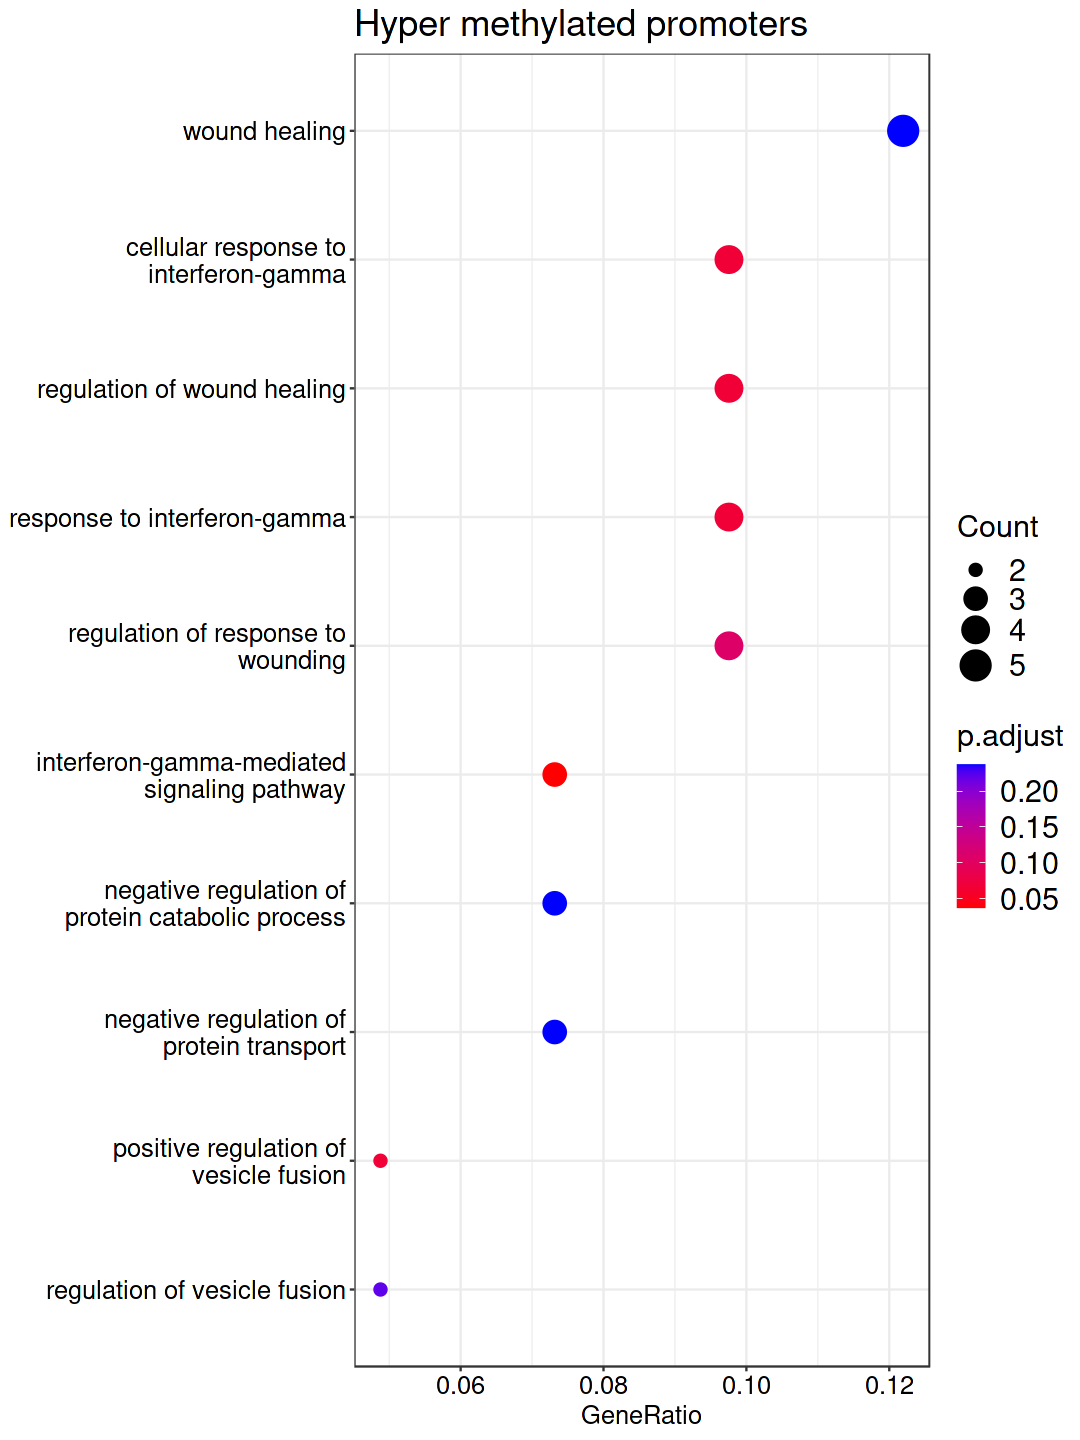

In [9]:
# ego <- simplify(ego)
options(repr.plot.width=9, repr.plot.height=12)
dotplot(ego, showCategory=10, font.size=15, title="Hyper methylated promoters") + theme(legend.text=element_text(size=18), 
                                                                         text = element_text(size=18))
ggsave(paste0(figdir, "/GOBP_top10_high_promoters.pdf"), width=10, height=9)

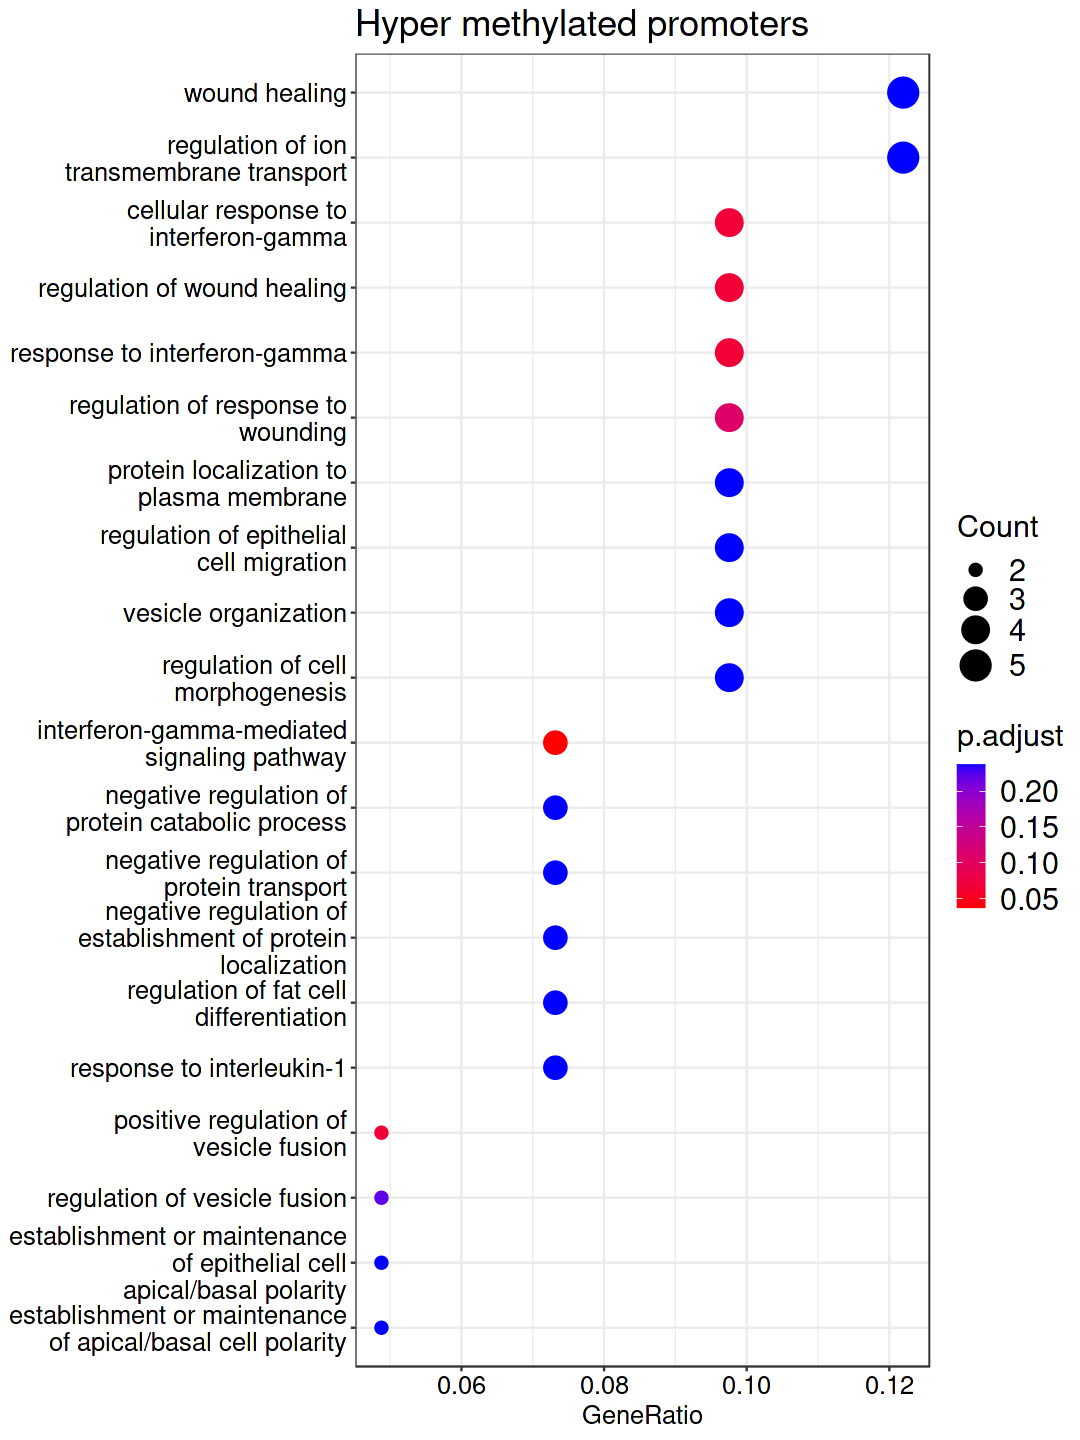

In [10]:
# ego <- simplify(ego)
options(repr.plot.width=9, repr.plot.height=12)
dotplot(ego, showCategory=20, font.size=15, title="Hyper methylated promoters") + theme(legend.text=element_text(size=18), 
                                                                         text = element_text(size=18))
ggsave(paste0(figdir, "/GOBP_top20_high_promoters.pdf"), width=10, height=10)

# low

In [11]:
genelist <- read.csv("low_promoters_allCpGs.csv")[,"Promoter"]

In [12]:
length(genelist)

[1] 220

In [13]:
length(unique(genelist))

[1] 161

In [14]:
gene.df <- bitr(genelist, fromType = "SYMBOL",
            toType = c("ENTREZID","ENSEMBL", "SYMBOL"),
            OrgDb = org.Hs.eg.db)
genelist <- gene.df$ENTREZID
ego <- enrichGO(gene          = genelist,
                OrgDb         = org.Hs.eg.db,
                ont           = "ALL",
                pAdjustMethod = "BH",
                pvalueCutoff  = 1,
                qvalueCutoff  = 1,
                readable      = TRUE)    

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(genelist, fromType = "SYMBOL", toType = c("ENTREZID", "ENSEMBL", :
“15.53% of input gene IDs are fail to map...”


In [15]:
write.csv(as.data.frame(ego), "GOBP_low_promoters.csv")

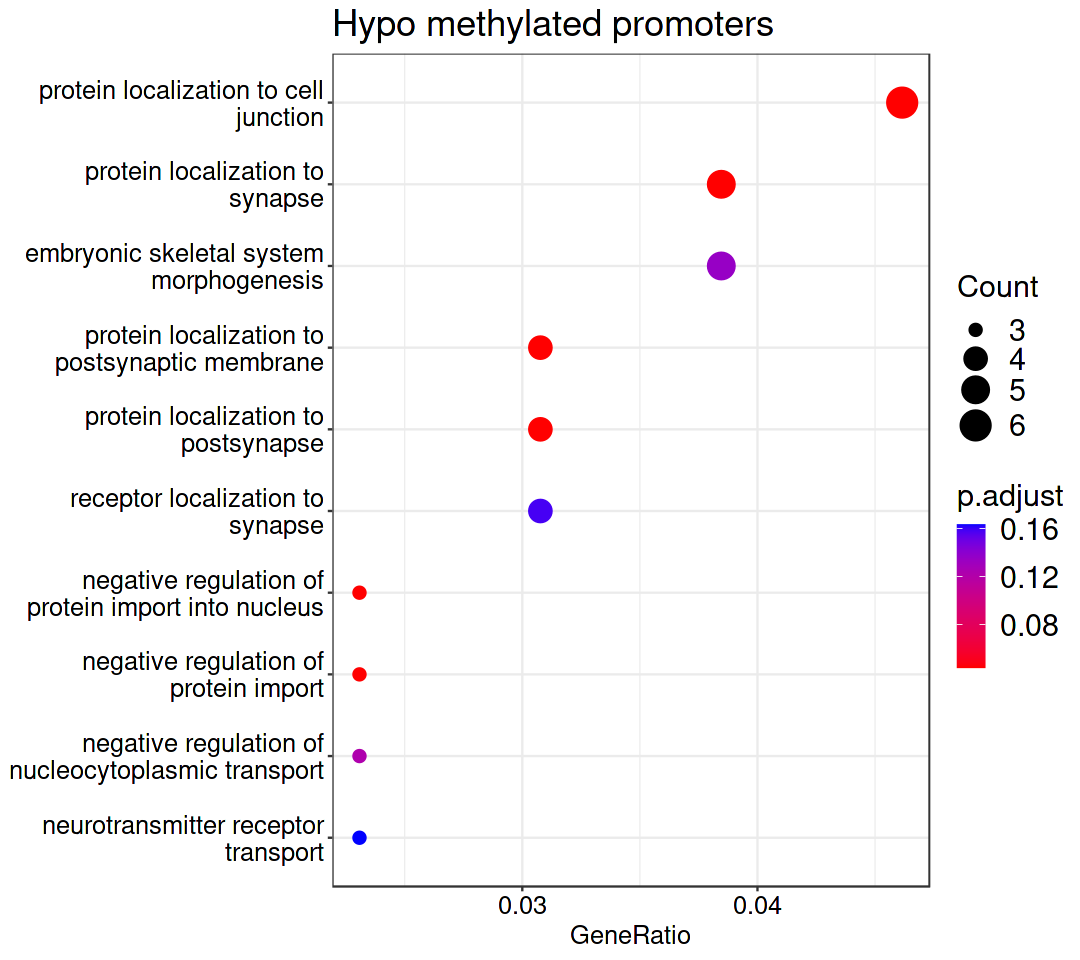

In [16]:
# ego <- simplify(ego)
options(repr.plot.width=9, repr.plot.height=8)
dotplot(ego, showCategory=10, font.size=15, title="Hypo methylated promoters") + theme(legend.text=element_text(size=18), 
                                                                         text = element_text(size=18))
ggsave(paste0(figdir, "/GOBP_top10_low_promoters.pdf"), width=9, height=8)

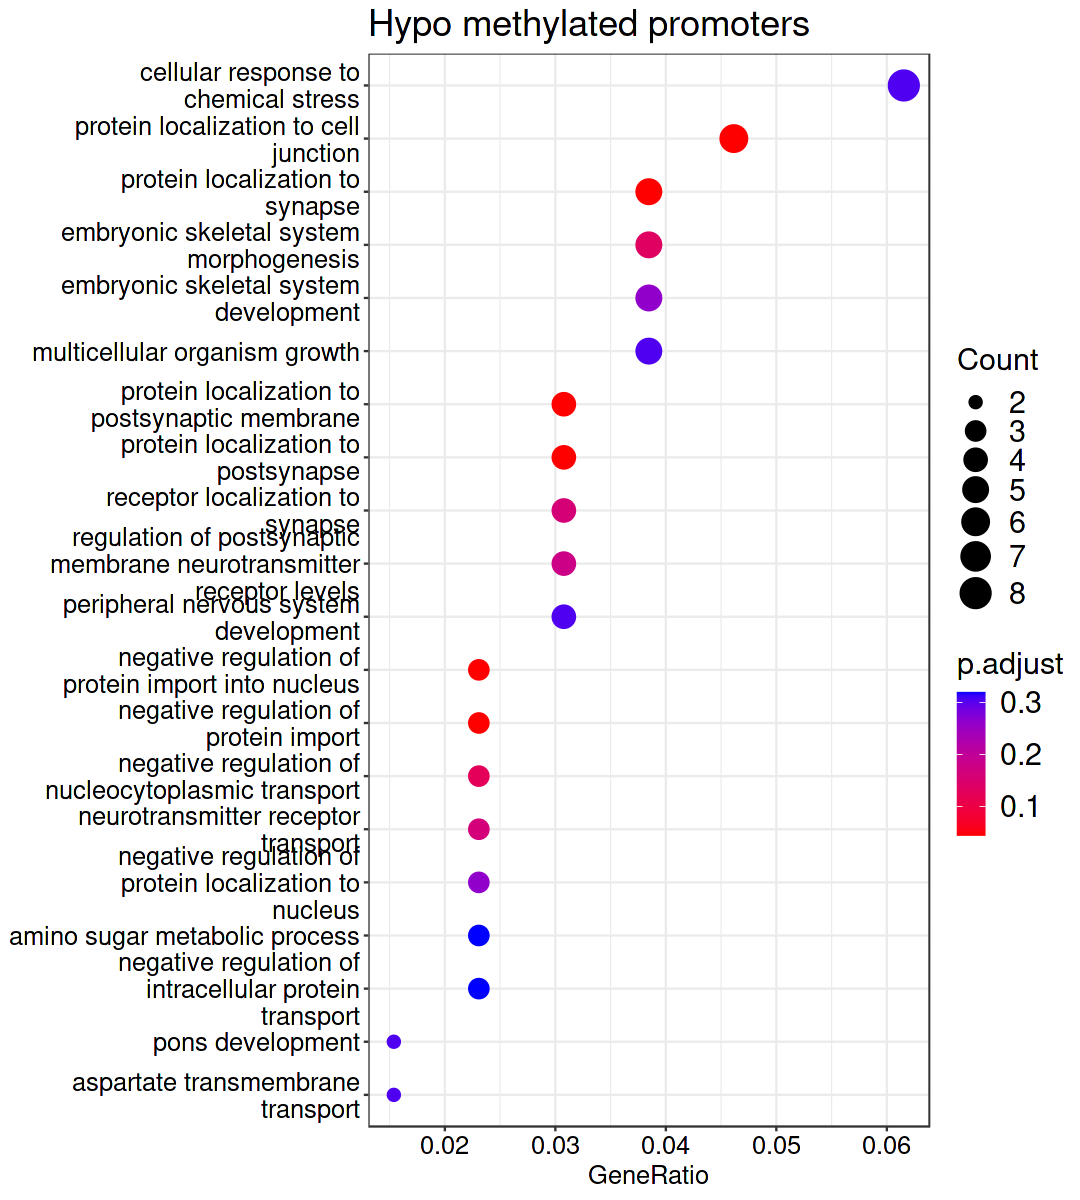

In [17]:
# ego <- simplify(ego)
options(repr.plot.width=9, repr.plot.height=10)
dotplot(ego, showCategory=20, font.size=15, title="Hypo methylated promoters") + theme(legend.text=element_text(size=18), 
                                                                         text = element_text(size=18))
ggsave(paste0(figdir, "/GOBP_top20_low_promoters.pdf"), width=9, height=10)